In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np

df = pd.read_csv(r'C:\Users\willi\Desktop\EE4211\dataport-export_gas_oct2015-mar2016.csv')
df['localminute'] = df['localminute'].map(lambda x: str(x)[:-3])
df['localminute'] = pd.to_datetime(df['localminute'], infer_datetime_format=True)



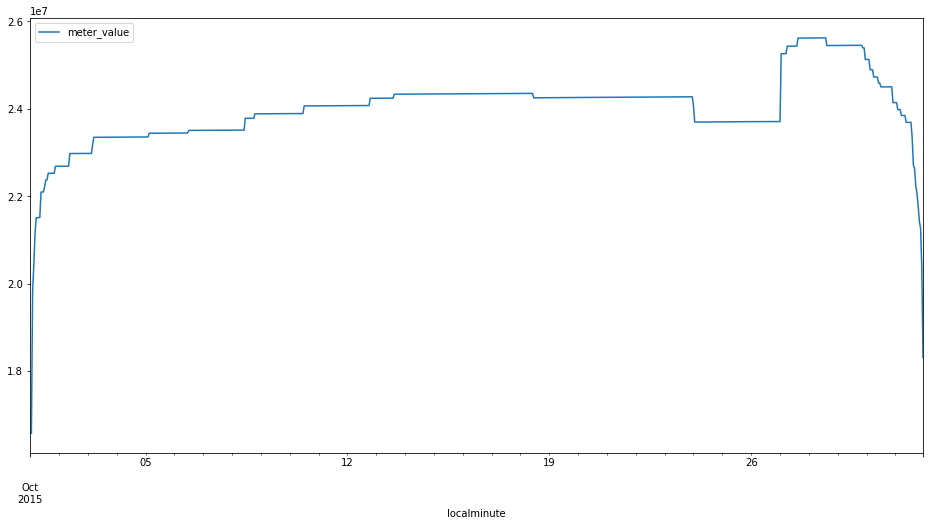

In [2]:
df_oct = df[df['localminute']<=datetime(2015,10,31,23,59,59)]
df_oct_hour = df_oct.set_index('localminute').groupby('dataid').resample('H').fillna(method='ffill')
#df_oct_hour[df_oct_hour['dataid']==35]
#plt.plot(list(df_oct_hour[df_oct_hour['dataid']==35]['meter_value']))
#plt.show()
df_oct_hour.drop('dataid', axis=1, inplace = True)
fig = plt.figure(figsize=(16,8))
axis1=fig.add_subplot(1,1,1)
df_oct_hour.groupby('localminute').sum().plot(ax=axis1)
plt.show()
#print(list(df_oct_hour[df_oct_hour['dataid']==35]['meter_value']))
#print(len(set(df['dataid'])))
#for meter_id in list(set(df['dataid'])):
#    print("Plotting gas usage for meter", meter_id)
#    plt.plot(list(df_oct_hour[df_oct_hour['dataid']==meter_id]['meter_value']))
#    plt.show()

In [182]:
len(df_oct_hour['meter_value'])
for i in range(len(df_oct_hour['meter_value'])):
    print(df_oct_hour['meter_value'][i] < 0)
    print(i)
    if (df_oct_hour['meter_value'][i] < 0):
        #print(df_oct_hour['meter_value'][i])
        df_oct_hour['meter_value'][i] = df_oct_hour['meter_value'][i+1]



False
0
False
1
False
2
False
3
False
4
False
5
False
6
False
7
False
8
False
9
False
10
False
11
False
12
False
13
False
14
False
15
False
16
False
17
False
18
False
19
False
20
False
21
False
22
False
23
False
24
False
25
False
26
False
27
False
28
False
29
False
30
False
31
False
32
False
33
False
34
localminute
2015-10-01 00:00:00    False
2015-10-01 01:00:00    False
2015-10-01 02:00:00    False
2015-10-01 03:00:00    False
2015-10-01 04:00:00    False
2015-10-01 05:00:00    False
2015-10-01 06:00:00    False
2015-10-01 07:00:00    False
2015-10-01 08:00:00    False
2015-10-01 09:00:00    False
2015-10-01 10:00:00    False
2015-10-01 11:00:00    False
2015-10-01 12:00:00    False
2015-10-01 13:00:00    False
2015-10-01 14:00:00    False
2015-10-01 15:00:00    False
2015-10-01 16:00:00    False
2015-10-01 17:00:00    False
2015-10-01 18:00:00    False
2015-10-01 19:00:00    False
2015-10-01 20:00:00    False
2015-10-01 21:00:00    False
2015-10-01 22:00:00    False
2015-10-01 23:00

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [183]:
#Validation Stuff: Looking for any nan_values
import math
i = 0
num_nans = []
for key in df_oct_hour['meter_value']:
    if math.isnan(float(key)):
        num_nans.append(i)
    i = i+1


In [184]:
print(num_nans)

[0]


In [7]:
#df_oct_hour.index[i][1] => Time
#ddf_oct_hour.index[i][0] => index
#df_oct_hour.iloc[i]['meter_value'] => meter_value
#i
measure = datetime(2015,10,1,0,0,0)
print(measure.date())
month_reading_by_hour = {}
timelines = {}
repeat = datetime(2015,1,1,0,0,0)
i = 0
while i < len(df_oct_hour):
    #print(df_oct_hour.iloc[i]['meter_value'])
    #print(df_oct_hour.index[i][1])
    #print(measure)
    if repeat == measure:
        print('repeat error')
        break
    if measure > datetime(2015,10,31,23,0,0):
        print('datetime out error')
        break
    if df_oct_hour.index[i][0] not in month_reading_by_hour:
        month_reading_by_hour[df_oct_hour.index[i][0]] = np.array([])
        timelines[df_oct_hour.index[i][0]] = np.array([])
    if measure != df_oct_hour.index[i][1]: #missing time, add nan
        new_array = np.append(month_reading_by_hour[df_oct_hour.index[i][0]], [np.nan])
        new_time = np.append(timelines[df_oct_hour.index[i][0]], [measure])
        measure = measure + timedelta(hours=1)
        if measure > datetime(2015,10,31,23,0,0):
            measure = datetime(2015,10,1,0,0,0)
        month_reading_by_hour[df_oct_hour.index[i][0]] = new_array
        timelines[df_oct_hour.index[i][0]] = new_time
        continue
    #add meter_value
    new_array = np.append(month_reading_by_hour[df_oct_hour.index[i][0]], [df_oct_hour.iloc[i]['meter_value']])
    new_time = np.append(timelines[df_oct_hour.index[i][0]], [measure])
    month_reading_by_hour[df_oct_hour.index[i][0]] = new_array
    timelines[df_oct_hour.index[i][0]] = new_time
    i=i+1
    repeat = measure
    measure = measure + timedelta(hours=1)
    if measure > datetime(2015,10,31,23,0,0):
        measure = datetime(2015,10,1,0,0,0)
#print(month_reading_by_hour)

2015-10-01


In [140]:
grouped = df_oct.set_index('localminute').groupby('dataid').resample('H').fillna(method="ffill")
grouped['meter_value'].interpolate(method='linear', inplace=True)
print(grouped)

                            dataid  meter_value
dataid localminute                             
35     2015-10-01 00:00:00     NaN          NaN
       2015-10-01 01:00:00    35.0      93470.0
       2015-10-01 02:00:00    35.0      93470.0
       2015-10-01 03:00:00    35.0      93470.0
       2015-10-01 04:00:00    35.0      93470.0
       2015-10-01 05:00:00    35.0      93470.0
       2015-10-01 06:00:00    35.0      93470.0
       2015-10-01 07:00:00    35.0      93472.0
       2015-10-01 08:00:00    35.0      93472.0
       2015-10-01 09:00:00    35.0      93472.0
       2015-10-01 10:00:00    35.0      93472.0
       2015-10-01 11:00:00    35.0      93472.0
       2015-10-01 12:00:00    35.0      93474.0
       2015-10-01 13:00:00    35.0      93474.0
       2015-10-01 14:00:00    35.0      93474.0
       2015-10-01 15:00:00    35.0      93474.0
       2015-10-01 16:00:00    35.0      93474.0
       2015-10-01 17:00:00    35.0      93474.0
       2015-10-01 18:00:00    35.0      

In [120]:
df_oct.set_index('localminute').groupby('dataid').resample('H').isnull()['dataid']

C:\Users\willi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called isnull(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


dataid  localminute        
35      2015-10-01 00:00:00    False
        2015-10-01 01:00:00     True
        2015-10-01 02:00:00    False
        2015-10-01 03:00:00    False
        2015-10-01 04:00:00    False
        2015-10-01 05:00:00    False
        2015-10-01 06:00:00    False
        2015-10-01 07:00:00    False
        2015-10-01 08:00:00    False
        2015-10-01 09:00:00    False
        2015-10-01 10:00:00     True
        2015-10-01 11:00:00    False
        2015-10-01 12:00:00    False
        2015-10-01 13:00:00     True
        2015-10-01 14:00:00     True
        2015-10-01 15:00:00    False
        2015-10-01 16:00:00    False
        2015-10-01 17:00:00    False
        2015-10-01 18:00:00    False
        2015-10-01 19:00:00    False
        2015-10-01 20:00:00     True
        2015-10-01 21:00:00    False
        2015-10-01 22:00:00    False
        2015-10-01 23:00:00    False
        2015-10-02 00:00:00    False
        2015-10-02 01:00:00    False
        20

In [142]:
for item in num_nans:
    print(grouped.iloc[743])

dataid            35.0
meter_value    94460.0
Name: (35, 2015-10-31 23:00:00), dtype: float64
dataid            35.0
meter_value    94460.0
Name: (35, 2015-10-31 23:00:00), dtype: float64
dataid            35.0
meter_value    94460.0
Name: (35, 2015-10-31 23:00:00), dtype: float64
dataid            35.0
meter_value    94460.0
Name: (35, 2015-10-31 23:00:00), dtype: float64
dataid            35.0
meter_value    94460.0
Name: (35, 2015-10-31 23:00:00), dtype: float64
dataid            35.0
meter_value    94460.0
Name: (35, 2015-10-31 23:00:00), dtype: float64
dataid            35.0
meter_value    94460.0
Name: (35, 2015-10-31 23:00:00), dtype: float64
dataid            35.0
meter_value    94460.0
Name: (35, 2015-10-31 23:00:00), dtype: float64
dataid            35.0
meter_value    94460.0
Name: (35, 2015-10-31 23:00:00), dtype: float64
dataid            35.0
meter_value    94460.0
Name: (35, 2015-10-31 23:00:00), dtype: float64
dataid            35.0
meter_value    94460.0
Name: (35, 201

In [6]:
for key in month_reading_by_hour:
    print(len(month_reading_by_hour[key]))

744
702
786
744
743
696
784
753
743
745
744
743
745
743
745
737
751
743
745
744
718
770
744
744
743
745
744
744
744
744
744
744
744
744
744
744
744
744
742
746
741
747
744
742
736
754
693
793
746
744
725
763
744
744
744
744
744
744
744
744
744
743
745
744
743
745
739
741
726
770
734
709
789
744
744
708
773
751
744
744
744
744
729
721
782
744
743
744
745
744
744
744
744
744
740
748
466
1022
744
553
935
744
744
744
744
744
744
744
744
744
744
744
744
738
748
665
825
419
1069
744
743
745
744
744
552
936
744
744
744
744
744
740
748
744
652
835
745
744
722
764
742
748


In [18]:
for key in timelines:
    process = np.array(list(set(timelines[key])))
    print(len(process))
    #difference = np.diff(timelines[key])
    print("key is", key)
    #print(len(difference))


744
key is 35
702
key is 44
744
key is 77
744
key is 94
743
key is 114
696
key is 187
744
key is 222
744
key is 252
743
key is 370
744
key is 483
744
key is 484
743
key is 661
744
key is 739
743
key is 744
744
key is 871
737
key is 1042
744
key is 1086
743
key is 1103
744
key is 1185
744
key is 1283
718
key is 1415
744
key is 1507
744
key is 1556
744
key is 1589
743
key is 1619
744
key is 1697
744
key is 1714
744
key is 1718
744
key is 1790
744
key is 1791
744
key is 1792
744
key is 1800
744
key is 1801
744
key is 2018
744
key is 2034
744
key is 2072
744
key is 2094
744
key is 2129
742
key is 2233
744
key is 2335
741
key is 2378
744
key is 2449
744
key is 2461
742
key is 2470
736
key is 2575
744
key is 2638
693
key is 2645
744
key is 2818
744
key is 2945
744
key is 2965
725
key is 2980
744
key is 3039
744
key is 3134
744
key is 3310
744
key is 3367
744
key is 3527
744
key is 3544
744
key is 3577
744
key is 3635
744
key is 3723
744
key is 3778
743
key is 3849
744
key is 3893
744
key is 

In [16]:
timelines[9982]

array([datetime.datetime(2015, 10, 31, 20, 0),
       datetime.datetime(2015, 10, 31, 21, 0),
       datetime.datetime(2015, 10, 31, 22, 0),
       datetime.datetime(2015, 10, 31, 23, 0),
       datetime.datetime(2015, 10, 1, 0, 0),
       datetime.datetime(2015, 10, 1, 1, 0),
       datetime.datetime(2015, 10, 1, 2, 0),
       datetime.datetime(2015, 10, 1, 3, 0),
       datetime.datetime(2015, 10, 1, 4, 0),
       datetime.datetime(2015, 10, 1, 5, 0),
       datetime.datetime(2015, 10, 1, 6, 0),
       datetime.datetime(2015, 10, 1, 7, 0),
       datetime.datetime(2015, 10, 1, 8, 0),
       datetime.datetime(2015, 10, 1, 9, 0),
       datetime.datetime(2015, 10, 1, 10, 0),
       datetime.datetime(2015, 10, 1, 11, 0),
       datetime.datetime(2015, 10, 1, 12, 0),
       datetime.datetime(2015, 10, 1, 13, 0),
       datetime.datetime(2015, 10, 1, 14, 0),
       datetime.datetime(2015, 10, 1, 15, 0),
       datetime.datetime(2015, 10, 1, 16, 0),
       datetime.datetime(2015, 10, 1, 17

In [115]:
#Manually adding missing time before and after data points

#df_oct_hour.index[i][1] => Time
#ddf_oct_hour.index[i][0] => index
#df_oct_hour.iloc[i]['meter_value'] => meter_value
all_id = list(set(df_oct_hour.index.get_level_values(0)))
all_id.sort()
df_oct_hour.index.get_level_values(0)
new_timings = {}
measure = datetime(2015, 10, 1, 1, 0, 0)
for key in all_id:
    q = 'dataid ==' + str(key)
    a = df_oct_hour.query(q)
    new_timings[key] = np.array([])
    while measure < datetime(2015,10,31,23,0,0):
        measure_str = str(measure)
        q2 = 'localminute == datetime(' + str(measure.year) + ',' + str(measure.month) + ',' + str(measure.day) + ',' + str(measure.hour) + ',' + str(measure.minute) + ',' + str(measure.second) + ')'
        #print(q2)
        x = a.query(q2)
        test = a.query('localminute == datetime(2015,11,1,23,0,0)')
        #print(test.index.get_level_values(1).empty)
        #print(x.index.get_level_values(1)[0]) #get datetime
        if x.index.get_level_values(1).empty: #no existing time
            print('if')
            readings = np.append(new_timings[key], [np.nan])
            new_timings[key] = readings
        elif measure == x.index.get_level_values(1)[0]: #match time
            print('elif')
            readings = np.append(new_timings[key], [x['meter_value'][0]])
            new_timings[key] = readings
        measure = measure + timedelta(hours=1)
        

        #break
    measure = datetime(2015, 10, 1, 1, 0, 0)
    #break
print(new_timings)

elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
if
if
if
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
e

elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
i

elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
el

elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
if
if
if
if
if
if
elif
elif
elif
elif
elif
elif
el

elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
i

elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
if
if
if
if
if
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
if
if
if
if
if
if
if
if


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
i

elif
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
el

if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
if
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
el

elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif


elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
if
if
if
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
elif
e

In [190]:
from scipy.interpolate import interp1d
new_timings[44]
idx=np.where(np.isfinite(new_timings[44]))
#print(idx)
#print(np.where(~np.isfinite(new_timings[44])))
#interp = interp1d()
x = np.diff(new_timings[44])
#print(np.diff(new_timings[44]))
x2 = x[~np.isnan(x)]
hourly_change = np.sum(x2)/len(x2)

for key in new_timings:
    idx=np.where(np.isfinite(new_timings[key]))
    if len(idx[0]) == 0:
        print(key)
        temp = np.zeros(742)
        new_timings[key] = temp
        continue
        
    x = np.diff(new_timings[key])
    x2 = x[~np.isnan(x)]
    hourly_change = np.sum(x2)/len(x2)
    first_idx = idx[0][0] - 1
    last_idx = idx[0][-1] + 1
    while first_idx >= 0:
        new_timings[key][first_idx] = new_timings[key][first_idx + 1] - hourly_change
        first_idx = first_idx - 1
    while last_idx <= 741:
        new_timings[key][last_idx] = new_timings[key][last_idx - 1] + hourly_change
        last_idx = last_idx + 1

6685
9620


In [191]:
new_timings[6830]

array([ 150370.63273728,  150371.7303989 ,  150372.82806052,
        150373.92572215,  150375.02338377,  150376.12104539,
        150377.21870702,  150378.31636864,  150379.41403026,
        150380.51169188,  150381.60935351,  150382.70701513,
        150383.80467675,  150384.90233838,  150386.        ,
        150386.        ,  150386.        ,  150388.        ,
        150388.        ,  150388.        ,  150388.        ,
        150388.        ,  150388.        ,  150388.        ,
        150388.        ,  150388.        ,  150388.        ,
        150388.        ,  150388.        ,  150388.        ,
        150388.        ,  150388.        ,  150388.        ,
        150388.        ,  150388.        ,  150388.        ,
        150388.        ,  150388.        ,  150388.        ,
        150388.        ,  150388.        ,  150388.        ,
        150388.        ,  150388.        ,  150388.        ,
        150388.        ,  150388.        ,  150388.        ,
        150388.        ,

In [193]:
hourly_reading_final = np.zeros(742)
#print(hourly_reading_final)
#print(new_timings[44])
for key in new_timings:
    hourly_reading_final = np.sum([hourly_reading_final, new_timings[key]], axis=0)


In [194]:
hourly_reading_final

array([ 26180764.36583398,  26180886.04363165,  26180959.15519374,
        26181056.66444986,  26181116.5780688 ,  26181247.50390074,
        26181452.42973266,  26181695.3555646 ,  26181876.28139652,
        26182226.86485307,  26182445.44830961,  26182590.03176615,
        26182675.41248296,  26182837.92937584,  26182944.44626873,
        26183073.86549998,  26183189.28473125,  26183386.7039625 ,
        26183576.12319377,  26183759.54242503,  26183972.96165628,
        26184280.62374468,  26184450.28583308,  26184665.94792148,
        26184893.61000989,  26185081.27209828,  26185160.93418669,
        26185364.59627509,  26185494.25836349,  26185625.92045189,
        26185855.5825403 ,  26186169.24462869,  26186510.9067171 ,
        26186757.60994025,  26186924.3131634 ,  26187101.01638656,
        26187301.71960971,  26187412.42283286,  26187559.12605602,
        26187735.82927917,  26187902.53250232,  26188055.23572547,
        26188255.93894863,  26188360.64217177,  26188523.34539

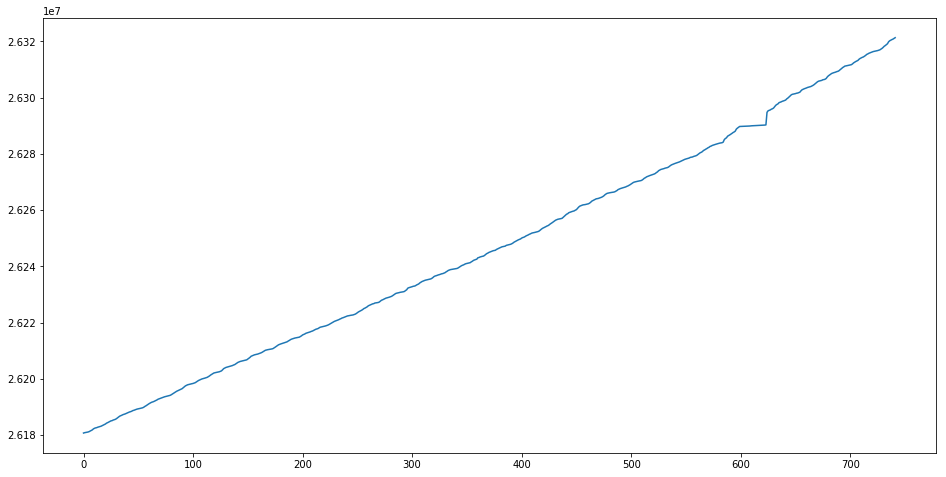

array([  121.67779768,    73.11156209,    97.50925612,    59.91361894,
         130.92583194,   204.92583193,   242.92583194,   180.92583193,
         350.58345655,   218.58345654,   144.58345654,    85.38071681,
         162.51689288,   106.51689288,   129.41923126,   115.41923126,
         197.41923125,   189.41923127,   183.41923125,   213.41923125,
         307.66208841,   169.6620884 ,   215.6620884 ,   227.6620884 ,
         187.6620884 ,    79.66208841,   203.66208841,   129.66208839,
         131.6620884 ,   229.66208841,   313.6620884 ,   341.6620884 ,
         246.70322315,   166.70322315,   176.70322316,   200.70322315,
         110.70322315,   146.70322316,   176.70322315,   166.70322316,
         152.70322315,   200.70322316,   104.70322315,   162.70322317,
         222.70322315,   104.70322315,   166.70322315,   134.70322316,
         134.70322315,    74.70322315,   106.70322315,    79.54490652,
         112.43315035,    84.43315035,   202.43315035,   274.43315035,
      

In [196]:
fig = plt.figure(figsize=(16,8))
plt.plot(hourly_reading_final)
plt.show()
np.diff(hourly_reading_final)

In [214]:

correlation_matrix = np.zeros((len(new_timings), len(new_timings)))
new_timings_copy = new_timings
x = 1
y = 0
for key in new_timings:
    for key_2 in new_timings_copy:
        if key==key_2:
            continue
        correlation = np.corrcoef(new_timings[key], new_timings_copy[key_2])
        print(correlation)
        correlation_matrix[y][x] = correlation[0][1]
        x = x+1
        if x>=len(new_timings_copy):
            x = 0
    
    y = y + 1



[[ 1.          0.99644015]
 [ 0.99644015  1.        ]]
[[ 1.          0.99607461]
 [ 0.99607461  1.        ]]
[[ 1.          0.99396163]
 [ 0.99396163  1.        ]]
[[ 1.          0.99668093]
 [ 0.99668093  1.        ]]
[[ 1.          0.97646816]
 [ 0.97646816  1.        ]]
[[ 1.          0.99135357]
 [ 0.99135357  1.        ]]
[[ 1.          0.98223843]
 [ 0.98223843  1.        ]]
[[ 1.          0.94241316]
 [ 0.94241316  1.        ]]
[[ 1.          0.99588192]
 [ 0.99588192  1.        ]]
[[ 1.          0.99176807]
 [ 0.99176807  1.        ]]
[[ 1.          0.99581496]
 [ 0.99581496  1.        ]]
[[ 1.          0.99617779]
 [ 0.99617779  1.        ]]
[[ 1.          0.98177391]
 [ 0.98177391  1.        ]]
[[ 1.          0.98770712]
 [ 0.98770712  1.        ]]
[[ 1.          0.99559355]
 [ 0.99559355  1.        ]]
[[ 1.          0.99687862]
 [ 0.99687862  1.        ]]
[[ 1.          0.99634394]
 [ 0.99634394  1.        ]]
[[ 1.          0.99360426]
 [ 0.99360426  1.        ]]
[[ 1.     

C:\Users\willi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\willi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]



[[ 1.          0.99327202]
 [ 0.99327202  1.        ]]
[[ 1.          0.99569512]
 [ 0.99569512  1.        ]]
[[ 1.          0.99805282]
 [ 0.99805282  1.        ]]
[[ 1.          0.99712317]
 [ 0.99712317  1.        ]]
[[ 1.          0.99749546]
 [ 0.99749546  1.        ]]
[[ 1.          0.99443644]
 [ 0.99443644  1.        ]]
[[ 1.          0.99604402]
 [ 0.99604402  1.        ]]
[[ 1.          0.99324824]
 [ 0.99324824  1.        ]]
[[ 1.          0.99205024]
 [ 0.99205024  1.        ]]
[[ 1.          0.98940734]
 [ 0.98940734  1.        ]]
[[ 1.          0.99721008]
 [ 0.99721008  1.        ]]
[[ 1.          0.99472105]
 [ 0.99472105  1.        ]]
[[ 1.          0.99204973]
 [ 0.99204973  1.        ]]
[[ 1.          0.99186905]
 [ 0.99186905  1.        ]]
[[ 1.          0.99870228]
 [ 0.99870228  1.        ]]
[[ 1.          0.95334321]
 [ 0.95334321  1.        ]]
[[ 1.          0.99751701]
 [ 0.99751701  1.        ]]
[[ 1.          0.99746055]
 [ 0.99746055  1.        ]]
[[ 1.    

[[ 1.         0.9958657]
 [ 0.9958657  1.       ]]
[[ 1.          0.99441791]
 [ 0.99441791  1.        ]]
[[ 1.          0.98864919]
 [ 0.98864919  1.        ]]
[[ 1.          0.99670915]
 [ 0.99670915  1.        ]]
[[ 1.          0.97646816]
 [ 0.97646816  1.        ]]
[[ 1.          0.98391001]
 [ 0.98391001  1.        ]]
[[ 1.          0.98158819]
 [ 0.98158819  1.        ]]
[[ 1.          0.98713847]
 [ 0.98713847  1.        ]]
[[ 1.          0.97536448]
 [ 0.97536448  1.        ]]
[[ 1.          0.98616357]
 [ 0.98616357  1.        ]]
[[ 1.          0.98608761]
 [ 0.98608761  1.        ]]
[[ 1.          0.86849615]
 [ 0.86849615  1.        ]]
[[ 1.          0.96743516]
 [ 0.96743516  1.        ]]
[[ 1.          0.99180648]
 [ 0.99180648  1.        ]]
[[ 1.          0.98620795]
 [ 0.98620795  1.        ]]
[[ 1.          0.98389861]
 [ 0.98389861  1.        ]]
[[ 1.          0.98390881]
 [ 0.98390881  1.        ]]
[[ 1.          0.96636425]
 [ 0.96636425  1.        ]]
[[ 1.         

 [ 0.94524644  1.        ]]
[[ 1.          0.95937547]
 [ 0.95937547  1.        ]]
[[ 1.         0.9425867]
 [ 0.9425867  1.       ]]
[[ 1.          0.93098753]
 [ 0.93098753  1.        ]]
[[ 1.          0.93976704]
 [ 0.93976704  1.        ]]
[[ 1.          0.91641229]
 [ 0.91641229  1.        ]]
[[ 1.          0.96809901]
 [ 0.96809901  1.        ]]
[[ 1.          0.92942812]
 [ 0.92942812  1.        ]]
[[ 1.          0.93544524]
 [ 0.93544524  1.        ]]
[[ 1.          0.94131463]
 [ 0.94131463  1.        ]]
[[ 1.          0.93557093]
 [ 0.93557093  1.        ]]
[[ 1.          0.93559733]
 [ 0.93559733  1.        ]]
[[ 1.          0.94113205]
 [ 0.94113205  1.        ]]
[[ 1.          0.93856855]
 [ 0.93856855  1.        ]]
[[ 1.          0.92651049]
 [ 0.92651049  1.        ]]
[[ 1.          0.94583418]
 [ 0.94583418  1.        ]]
[[ 1.         0.9208647]
 [ 0.9208647  1.       ]]
[[ 1.          0.96655595]
 [ 0.96655595  1.        ]]
[[ 1.          0.93337596]
 [ 0.93337596  1. 

[[ 1.          0.98197458]
 [ 0.98197458  1.        ]]
[[ 1.          0.98925722]
 [ 0.98925722  1.        ]]
[[ 1.          0.99255717]
 [ 0.99255717  1.        ]]
[[ 1.         0.9890777]
 [ 0.9890777  1.       ]]
[[ 1.          0.98399473]
 [ 0.98399473  1.        ]]
[[ 1.          0.99087123]
 [ 0.99087123  1.        ]]
[[ 1.          0.99058219]
 [ 0.99058219  1.        ]]
[[ 1.          0.97610503]
 [ 0.97610503  1.        ]]
[[ 1.          0.97634658]
 [ 0.97634658  1.        ]]
[[ 1.          0.98815211]
 [ 0.98815211  1.        ]]
[[ 1.          0.98113723]
 [ 0.98113723  1.        ]]
[[ 1.        0.987154]
 [ 0.987154  1.      ]]
[[ 1.          0.97955115]
 [ 0.97955115  1.        ]]
[[ 1.          0.98894587]
 [ 0.98894587  1.        ]]
[[ 1.          0.93420766]
 [ 0.93420766  1.        ]]
[[ 1.          0.99167777]
 [ 0.99167777  1.        ]]
[[ 1.          0.99237366]
 [ 0.99237366  1.        ]]
[[ 1.          0.59057442]
 [ 0.59057442  1.        ]]
[[ 1.          0.99103

[[ 1.          0.99654539]
 [ 0.99654539  1.        ]]
[[ 1.          0.99866722]
 [ 0.99866722  1.        ]]
[[ 1.          0.99537661]
 [ 0.99537661  1.        ]]
[[ 1.          0.99802415]
 [ 0.99802415  1.        ]]
[[ 1.          0.99311424]
 [ 0.99311424  1.        ]]
[[ 1.          0.99685206]
 [ 0.99685206  1.        ]]
[[ 1.         0.9931547]
 [ 0.9931547  1.       ]]
[[ 1.          0.98010394]
 [ 0.98010394  1.        ]]
[[ 1.          0.99369449]
 [ 0.99369449  1.        ]]
[[ 1.          0.99644935]
 [ 0.99644935  1.        ]]
[[ 1.          0.99905348]
 [ 0.99905348  1.        ]]
[[ 1.          0.99751284]
 [ 0.99751284  1.        ]]
[[ 1.          0.99039727]
 [ 0.99039727  1.        ]]
[[ 1.          0.99600733]
 [ 0.99600733  1.        ]]
[[ 1.          0.99832412]
 [ 0.99832412  1.        ]]
[[ 1.          0.99831548]
 [ 0.99831548  1.        ]]
[[ 1.          0.99686571]
 [ 0.99686571  1.        ]]
[[ 1.          0.99703348]
 [ 0.99703348  1.        ]]
[[ 1.         

 [ 0.98931232  1.        ]]
[[ 1.          0.99591648]
 [ 0.99591648  1.        ]]
[[ 1.          0.98274999]
 [ 0.98274999  1.        ]]
[[ 1.          0.99722307]
 [ 0.99722307  1.        ]]
[[ 1.          0.99319911]
 [ 0.99319911  1.        ]]
[[ 1.          0.99911485]
 [ 0.99911485  1.        ]]
[[ 1.          0.99370564]
 [ 0.99370564  1.        ]]
[[ 1.          0.99045963]
 [ 0.99045963  1.        ]]
[[ 1.          0.99422211]
 [ 0.99422211  1.        ]]
[[ 1.          0.99890516]
 [ 0.99890516  1.        ]]
[[ 1.          0.99791176]
 [ 0.99791176  1.        ]]
[[ 1.          0.98595743]
 [ 0.98595743  1.        ]]
[[ 1.          0.98900207]
 [ 0.98900207  1.        ]]
[[ 1.          0.99139268]
 [ 0.99139268  1.        ]]
[[ 1.         0.9946922]
 [ 0.9946922  1.       ]]
[[ 1.         0.9993753]
 [ 0.9993753  1.       ]]
[[ 1.          0.99809679]
 [ 0.99809679  1.        ]]
[[ 1.          0.99854975]
 [ 0.99854975  1.        ]]
[[ 1.          0.99825677]
 [ 0.99825677  1. 

[[ 1.         0.9992893]
 [ 0.9992893  1.       ]]
[[ 1.          0.99931552]
 [ 0.99931552  1.        ]]
[[ 1.          0.65018422]
 [ 0.65018422  1.        ]]
[[ 1.          0.99918949]
 [ 0.99918949  1.        ]]
[[ 1.          0.96930873]
 [ 0.96930873  1.        ]]
[[ 1.        0.977402]
 [ 0.977402  1.      ]]
[[ 1.         0.9992385]
 [ 0.9992385  1.       ]]
[[ 1.          0.99233032]
 [ 0.99233032  1.        ]]
[[ 1.          0.99729135]
 [ 0.99729135  1.        ]]
[[ 1.          0.99836284]
 [ 0.99836284  1.        ]]
[[ 1.          0.97350898]
 [ 0.97350898  1.        ]]
[[ 1.          0.97667939]
 [ 0.97667939  1.        ]]
[[ 1.          0.99163098]
 [ 0.99163098  1.        ]]
[[ 1.          0.98251512]
 [ 0.98251512  1.        ]]
[[ 1.          0.97710085]
 [ 0.97710085  1.        ]]
[[ 1.          0.99575562]
 [ 0.99575562  1.        ]]
[[ 1.          0.99925887]
 [ 0.99925887  1.        ]]
[[ 1.          0.99924623]
 [ 0.99924623  1.        ]]
[[ 1.          0.99807738]

[[ 1.          0.99860635]
 [ 0.99860635  1.        ]]
[[ 1.          0.99866143]
 [ 0.99866143  1.        ]]
[[ 1.          0.99862651]
 [ 0.99862651  1.        ]]
[[ 1.          0.99813692]
 [ 0.99813692  1.        ]]
[[ 1.          0.99802183]
 [ 0.99802183  1.        ]]
[[ 1.          0.99559846]
 [ 0.99559846  1.        ]]
[[ 1.          0.99305664]
 [ 0.99305664  1.        ]]
[[ 1.          0.99003944]
 [ 0.99003944  1.        ]]
[[ 1.          0.99742654]
 [ 0.99742654  1.        ]]
[[ 1.          0.99556125]
 [ 0.99556125  1.        ]]
[[ 1.          0.99333838]
 [ 0.99333838  1.        ]]
[[ 1.          0.99840692]
 [ 0.99840692  1.        ]]
[[ 1.          0.95996543]
 [ 0.95996543  1.        ]]
[[ 1.          0.99799038]
 [ 0.99799038  1.        ]]
[[ 1.          0.99814162]
 [ 0.99814162  1.        ]]
[[ 1.          0.67587143]
 [ 0.67587143  1.        ]]
[[ 1.          0.99866285]
 [ 0.99866285  1.        ]]
[[ 1.          0.97284174]
 [ 0.97284174  1.        ]]
[[ 1.     

 [ 0.99288874  1.        ]]
[[ 1.          0.99860494]
 [ 0.99860494  1.        ]]
[[ 1.          0.94682969]
 [ 0.94682969  1.        ]]
[[ 1.          0.99977354]
 [ 0.99977354  1.        ]]
[[ 1.          0.63836818]
 [ 0.63836818  1.        ]]
[[ 1.          0.99892249]
 [ 0.99892249  1.        ]]
[[ 1.          0.96441989]
 [ 0.96441989  1.        ]]
[[ 1.          0.98045795]
 [ 0.98045795  1.        ]]
[[ 1.          0.99994551]
 [ 0.99994551  1.        ]]
[[ 1.          0.99042197]
 [ 0.99042197  1.        ]]
[[ 1.          0.99665833]
 [ 0.99665833  1.        ]]
[[ 1.          0.99710363]
 [ 0.99710363  1.        ]]
[[ 1.          0.97052688]
 [ 0.97052688  1.        ]]
[[ 1.          0.97240429]
 [ 0.97240429  1.        ]]
[[ 1.          0.98974488]
 [ 0.98974488  1.        ]]
[[ 1.         0.9847714]
 [ 0.9847714  1.       ]]
[[ 1.          0.98161531]
 [ 0.98161531  1.        ]]
[[ 1.          0.99720573]
 [ 0.99720573  1.        ]]
[[ 1.          0.99995507]
 [ 0.99995507 

[[ 1.          0.99698069]
 [ 0.99698069  1.        ]]
[[ 1.          0.99274289]
 [ 0.99274289  1.        ]]
[[ 1.          0.99777261]
 [ 0.99777261  1.        ]]
[[ 1.          0.96459254]
 [ 0.96459254  1.        ]]
[[ 1.          0.99638879]
 [ 0.99638879  1.        ]]
[[ 1.          0.99665833]
 [ 0.99665833  1.        ]]
[[ 1.         0.6823109]
 [ 0.6823109  1.       ]]
[[ 1.          0.99787976]
 [ 0.99787976  1.        ]]
[[ 1.          0.97503863]
 [ 0.97503863  1.        ]]
[[ 1.          0.97317425]
 [ 0.97317425  1.        ]]
[[ 1.          0.99631059]
 [ 0.99631059  1.        ]]
[[ 1.          0.99624007]
 [ 0.99624007  1.        ]]
[[ 1.          0.99612619]
 [ 0.99612619  1.        ]]
[[ 1.          0.98368984]
 [ 0.98368984  1.        ]]
[[ 1.          0.98257935]
 [ 0.98257935  1.        ]]
[[ 1.          0.99605951]
 [ 0.99605951  1.        ]]
[[ 1.          0.97055092]
 [ 0.97055092  1.        ]]
[[ 1.          0.97965389]
 [ 0.97965389  1.        ]]
[[ 1.         

[[ 1.          0.99743803]
 [ 0.99743803  1.        ]]
[[ 1.          0.98174228]
 [ 0.98174228  1.        ]]
[[ 1.          0.98985953]
 [ 0.98985953  1.        ]]
[[ 1.          0.99248723]
 [ 0.99248723  1.        ]]
[[ 1.          0.95448362]
 [ 0.95448362  1.        ]]
[[ 1.          0.95727434]
 [ 0.95727434  1.        ]]
[[ 1.         0.9793318]
 [ 0.9793318  1.       ]]
[[ 1.          0.99126842]
 [ 0.99126842  1.        ]]
[[ 1.          0.97614541]
 [ 0.97614541  1.        ]]
[[ 1.          0.99737609]
 [ 0.99737609  1.        ]]
[[ 1.          0.99473762]
 [ 0.99473762  1.        ]]
[[ 1.          0.99124454]
 [ 0.99124454  1.        ]]
[[ 1.          0.99781476]
 [ 0.99781476  1.        ]]
[[ 1.          0.98016294]
 [ 0.98016294  1.        ]]
[[ 1.          0.99271284]
 [ 0.99271284  1.        ]]
[[ 1.          0.98096854]
 [ 0.98096854  1.        ]]
[[ 1.          0.98687293]
 [ 0.98687293  1.        ]]
[[ 1.          0.96812135]
 [ 0.96812135  1.        ]]
[[ 1.         

[[ 1.          0.99496549]
 [ 0.99496549  1.        ]]
[[ 1.          0.98791779]
 [ 0.98791779  1.        ]]
[[ 1.          0.99137475]
 [ 0.99137475  1.        ]]
[[ 1.         0.9901295]
 [ 0.9901295  1.       ]]
[[ 1.          0.98768549]
 [ 0.98768549  1.        ]]
[[ 1.          0.99355432]
 [ 0.99355432  1.        ]]
[[ 1.          0.99015253]
 [ 0.99015253  1.        ]]
[[ 1.          0.99124167]
 [ 0.99124167  1.        ]]
[[ 1.          0.98929208]
 [ 0.98929208  1.        ]]
[[ 1.          0.96158073]
 [ 0.96158073  1.        ]]
[[ 1.          0.99371719]
 [ 0.99371719  1.        ]]
[[ 1.          0.99211203]
 [ 0.99211203  1.        ]]
[[ 1.         0.9927731]
 [ 0.9927731  1.       ]]
[[ 1.          0.99536709]
 [ 0.99536709  1.        ]]
[[ 1.          0.99227829]
 [ 0.99227829  1.        ]]
[[ 1.          0.99213083]
 [ 0.99213083  1.        ]]
[[ 1.          0.99066223]
 [ 0.99066223  1.        ]]
[[ 1.          0.99357321]
 [ 0.99357321  1.        ]]
[[ 1.          0.9

[[ 1.          0.99258769]
 [ 0.99258769  1.        ]]
[[ 1.          0.99460373]
 [ 0.99460373  1.        ]]
[[ 1.          0.98814801]
 [ 0.98814801  1.        ]]
[[ 1.          0.99810247]
 [ 0.99810247  1.        ]]
[[ 1.          0.98764719]
 [ 0.98764719  1.        ]]
[[ 1.         0.9864865]
 [ 0.9864865  1.       ]]
[[ 1.          0.99715758]
 [ 0.99715758  1.        ]]
[[ 1.          0.98935782]
 [ 0.98935782  1.        ]]
[[ 1.          0.99256261]
 [ 0.99256261  1.        ]]
[[  1.  nan]
 [ nan  nan]]
[[ 1.          0.99709706]
 [ 0.99709706  1.        ]]
[[ 1.          0.99267459]
 [ 0.99267459  1.        ]]
[[ 1.          0.99532704]
 [ 0.99532704  1.        ]]
[[ 1.          0.98321693]
 [ 0.98321693  1.        ]]
[[ 1.          0.99612625]
 [ 0.99612625  1.        ]]
[[ 1.          0.98662929]
 [ 0.98662929  1.        ]]
[[ 1.          0.99386978]
 [ 0.99386978  1.        ]]
[[ 1.          0.98878619]
 [ 0.98878619  1.        ]]
[[ 1.          0.99256027]
 [ 0.99256027  

[[ 1.          0.99517529]
 [ 0.99517529  1.        ]]
[[ 1.          0.98479867]
 [ 0.98479867  1.        ]]
[[ 1.          0.99506666]
 [ 0.99506666  1.        ]]
[[ 1.          0.99738468]
 [ 0.99738468  1.        ]]
[[ 1.          0.99890742]
 [ 0.99890742  1.        ]]
[[ 1.          0.99803868]
 [ 0.99803868  1.        ]]
[[ 1.          0.99677109]
 [ 0.99677109  1.        ]]
[[ 1.          0.99887351]
 [ 0.99887351  1.        ]]
[[ 1.          0.97994469]
 [ 0.97994469  1.        ]]
[[ 1.          0.99443547]
 [ 0.99443547  1.        ]]
[[ 1.          0.98573938]
 [ 0.98573938  1.        ]]
[[ 1.          0.93973424]
 [ 0.93973424  1.        ]]
[[ 1.          0.99601949]
 [ 0.99601949  1.        ]]
[[ 1.         0.9944159]
 [ 0.9944159  1.       ]]
[[ 1.          0.99809045]
 [ 0.99809045  1.        ]]
[[ 1.          0.99825566]
 [ 0.99825566  1.        ]]
[[ 1.          0.98548906]
 [ 0.98548906  1.        ]]
[[ 1.          0.99064285]
 [ 0.99064285  1.        ]]
[[ 1.         

[[ 1.          0.99791804]
 [ 0.99791804  1.        ]]
[[ 1.          0.99679364]
 [ 0.99679364  1.        ]]
[[ 1.          0.99653119]
 [ 0.99653119  1.        ]]
[[ 1.          0.99477665]
 [ 0.99477665  1.        ]]
[[ 1.          0.99703427]
 [ 0.99703427  1.        ]]
[[ 1.          0.99130942]
 [ 0.99130942  1.        ]]
[[ 1.         0.9895992]
 [ 0.9895992  1.       ]]
[[ 1.          0.98913845]
 [ 0.98913845  1.        ]]
[[ 1.          0.99733657]
 [ 0.99733657  1.        ]]
[[ 1.          0.99384451]
 [ 0.99384451  1.        ]]
[[ 1.          0.99034081]
 [ 0.99034081  1.        ]]
[[ 1.          0.99136195]
 [ 0.99136195  1.        ]]
[[ 1.          0.99774154]
 [ 0.99774154  1.        ]]
[[ 1.          0.95162116]
 [ 0.95162116  1.        ]]
[[ 1.          0.99732007]
 [ 0.99732007  1.        ]]
[[ 1.          0.99728784]
 [ 0.99728784  1.        ]]
[[ 1.          0.66097949]
 [ 0.66097949  1.        ]]
[[ 1.          0.99554473]
 [ 0.99554473  1.        ]]
[[ 1.         

 [ 0.99708298  1.        ]]
[[ 1.          0.99530708]
 [ 0.99530708  1.        ]]
[[ 1.          0.98847093]
 [ 0.98847093  1.        ]]
[[ 1.         0.9978631]
 [ 0.9978631  1.       ]]
[[ 1.          0.99668433]
 [ 0.99668433  1.        ]]
[[ 1.          0.99741226]
 [ 0.99741226  1.        ]]
[[ 1.          0.99699123]
 [ 0.99699123  1.        ]]
[[ 1.         0.9974292]
 [ 0.9974292  1.       ]]
[[ 1.          0.99621629]
 [ 0.99621629  1.        ]]
[[ 1.          0.99586409]
 [ 0.99586409  1.        ]]
[[ 1.          0.99508415]
 [ 0.99508415  1.        ]]
[[ 1.          0.98712645]
 [ 0.98712645  1.        ]]
[[ 1.          0.99864149]
 [ 0.99864149  1.        ]]
[[ 1.          0.99815843]
 [ 0.99815843  1.        ]]
[[ 1.          0.99691297]
 [ 0.99691297  1.        ]]
[[ 1.          0.99319684]
 [ 0.99319684  1.        ]]
[[ 1.          0.99732853]
 [ 0.99732853  1.        ]]
[[ 1.          0.96482943]
 [ 0.96482943  1.        ]]
[[ 1.          0.99652435]
 [ 0.99652435  1. 

 [ 0.99353981  1.        ]]
[[ 1.          0.99543794]
 [ 0.99543794  1.        ]]
[[ 1.          0.99896519]
 [ 0.99896519  1.        ]]
[[ 1.          0.99945747]
 [ 0.99945747  1.        ]]
[[ 1.          0.99823715]
 [ 0.99823715  1.        ]]
[[ 1.          0.99750372]
 [ 0.99750372  1.        ]]
[[ 1.          0.99814183]
 [ 0.99814183  1.        ]]
[[ 1.          0.99593736]
 [ 0.99593736  1.        ]]
[[ 1.          0.99068119]
 [ 0.99068119  1.        ]]
[[ 1.          0.98946114]
 [ 0.98946114  1.        ]]
[[ 1.          0.99880511]
 [ 0.99880511  1.        ]]
[[ 1.          0.99559454]
 [ 0.99559454  1.        ]]
[[ 1.          0.99500715]
 [ 0.99500715  1.        ]]
[[ 1.         0.9928393]
 [ 0.9928393  1.       ]]
[[ 1.          0.99848395]
 [ 0.99848395  1.        ]]
[[ 1.          0.95509691]
 [ 0.95509691  1.        ]]
[[ 1.          0.99919774]
 [ 0.99919774  1.        ]]
[[ 1.          0.99925619]
 [ 0.99925619  1.        ]]
[[ 1.          0.65574388]
 [ 0.65574388 

 [ 0.97899144  1.        ]]
[[ 1.         0.9986903]
 [ 0.9986903  1.       ]]
[[ 1.          0.99444363]
 [ 0.99444363  1.        ]]
[[ 1.          0.99803995]
 [ 0.99803995  1.        ]]
[[ 1.          0.99713281]
 [ 0.99713281  1.        ]]
[[ 1.          0.97695229]
 [ 0.97695229  1.        ]]
[[ 1.          0.97726917]
 [ 0.97726917  1.        ]]
[[ 1.          0.99389446]
 [ 0.99389446  1.        ]]
[[ 1.          0.97860621]
 [ 0.97860621  1.        ]]
[[ 1.          0.98092492]
 [ 0.98092492  1.        ]]
[[ 1.          0.99409025]
 [ 0.99409025  1.        ]]
[[ 1.          0.99877996]
 [ 0.99877996  1.        ]]
[[ 1.          0.99949308]
 [ 0.99949308  1.        ]]
[[ 1.         0.9988595]
 [ 0.9988595  1.       ]]
[[ 1.          0.99290338]
 [ 0.99290338  1.        ]]
[[ 1.          0.99248916]
 [ 0.99248916  1.        ]]
[[ 1.          0.99676749]
 [ 0.99676749  1.        ]]
[[ 1.          0.99227829]
 [ 0.99227829  1.        ]]
[[ 1.          0.99662262]
 [ 0.99662262  1. 

 [ 0.98623282  1.        ]]
[[ 1.          0.98835969]
 [ 0.98835969  1.        ]]
[[ 1.          0.99356151]
 [ 0.99356151  1.        ]]
[[ 1.          0.95228767]
 [ 0.95228767  1.        ]]
[[ 1.          0.99214361]
 [ 0.99214361  1.        ]]
[[ 1.          0.99199991]
 [ 0.99199991  1.        ]]
[[ 1.          0.70400195]
 [ 0.70400195  1.        ]]
[[ 1.        0.992263]
 [ 0.992263  1.      ]]
[[ 1.          0.96889986]
 [ 0.96889986  1.        ]]
[[ 1.          0.98413455]
 [ 0.98413455  1.        ]]
[[ 1.          0.99161592]
 [ 0.99161592  1.        ]]
[[ 1.          0.99336711]
 [ 0.99336711  1.        ]]
[[ 1.          0.99161425]
 [ 0.99161425  1.        ]]
[[ 1.          0.99171583]
 [ 0.99171583  1.        ]]
[[ 1.          0.97902467]
 [ 0.97902467  1.        ]]
[[ 1.          0.96702702]
 [ 0.96702702  1.        ]]
[[ 1.          0.99211094]
 [ 0.99211094  1.        ]]
[[ 1.          0.96990305]
 [ 0.96990305  1.        ]]
[[ 1.          0.97823191]
 [ 0.97823191  1. 

[[ 1.          0.98838691]
 [ 0.98838691  1.        ]]
[[ 1.         0.9970457]
 [ 0.9970457  1.       ]]
[[ 1.          0.99370351]
 [ 0.99370351  1.        ]]
[[ 1.          0.99460373]
 [ 0.99460373  1.        ]]
[[ 1.          0.99195697]
 [ 0.99195697  1.        ]]
[[ 1.          0.99648703]
 [ 0.99648703  1.        ]]
[[ 1.          0.99795621]
 [ 0.99795621  1.        ]]
[[ 1.          0.98077572]
 [ 0.98077572  1.        ]]
[[ 1.          0.98044969]
 [ 0.98044969  1.        ]]
[[ 1.          0.99510215]
 [ 0.99510215  1.        ]]
[[ 1.          0.99595006]
 [ 0.99595006  1.        ]]
[[ 1.          0.99765317]
 [ 0.99765317  1.        ]]
[[ 1.          0.99798405]
 [ 0.99798405  1.        ]]
[[ 1.          0.99740685]
 [ 0.99740685  1.        ]]
[[ 1.          0.99747807]
 [ 0.99747807  1.        ]]
[[ 1.          0.99284683]
 [ 0.99284683  1.        ]]
[[ 1.         0.9944571]
 [ 0.9944571  1.       ]]
[[ 1.          0.99751001]
 [ 0.99751001  1.        ]]
[[ 1.          0.9

 [ 0.98775544  1.        ]]
[[ 1.          0.99106461]
 [ 0.99106461  1.        ]]
[[ 1.          0.98684274]
 [ 0.98684274  1.        ]]
[[ 1.          0.97487487]
 [ 0.97487487  1.        ]]
[[ 1.          0.98728193]
 [ 0.98728193  1.        ]]
[[ 1.          0.99173114]
 [ 0.99173114  1.        ]]
[[ 1.          0.99271272]
 [ 0.99271272  1.        ]]
[[ 1.          0.99187006]
 [ 0.99187006  1.        ]]
[[ 1.      0.9788]
 [ 0.9788  1.    ]]
[[ 1.          0.98681461]
 [ 0.98681461  1.        ]]
[[ 1.          0.99405011]
 [ 0.99405011  1.        ]]
[[ 1.          0.99232474]
 [ 0.99232474  1.        ]]
[[ 1.          0.99113432]
 [ 0.99113432  1.        ]]
[[ 1.         0.9938423]
 [ 0.9938423  1.       ]]
[[ 1.          0.98866679]
 [ 0.98866679  1.        ]]
[[ 1.          0.97286208]
 [ 0.97286208  1.        ]]
[[ 1.          0.99363655]
 [ 0.99363655  1.        ]]
[[ 1.          0.99322932]
 [ 0.99322932  1.        ]]
[[  1.  nan]
 [ nan  nan]]
[[ 1.          0.99173428]
 [ 

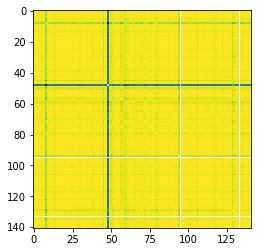

In [210]:
plt.imshow(correlation_matrix)
plt.show()

In [215]:
correlation_matrix[0]

array([ 0.        ,  0.99644015,  0.99607461,  0.99396163,  0.99668093,
        0.97646816,  0.99135357,  0.98223843,  0.94241316,  0.99588192,
        0.99176807,  0.99581496,  0.99617779,  0.98177391,  0.98770712,
        0.99559355,  0.99687862,  0.99634394,  0.99360426,  0.99473671,
        0.99519941,  0.99700338,  0.99676717,  0.99668436,  0.9946848 ,
        0.98774998,  0.99523212,  0.99626077,  0.99531816,  0.99660131,
        0.9937672 ,  0.99284074,  0.99702949,  0.99703668,  0.99617561,
        0.99561616,  0.99586067,  0.99148699,  0.98744263,  0.98930036,
        0.99643609,  0.99304736,  0.99117907,  0.99126145,  0.99667195,
        0.9514454 ,  0.99687313,  0.99701815,  0.6558933 ,  0.99654866,
        0.96669534,  0.98168476,  0.99690086,  0.9909287 ,  0.99476333,
        0.99597682,  0.97382723,  0.97050353,  0.9896771 ,  0.98041261,
        0.97856343,  0.99310468,  0.99688928,  0.99738488,  0.995543  ,
        0.9924927 ,  0.98901339,  0.9933243 ,  0.99074669,  0.99

In [216]:
x = correlation_matrix[0]
x.argsort()[-5:][::-1]


array([ 95, 133, 102, 131,  63], dtype=int64)

In [224]:
i = 0
all_id = list(new_timings.keys())
print(all_id[0])
for key in new_timings:
    
    top_5_index = correlation_matrix[i].argsort()[-5:][::-1]
    print("The 5 most correlated houses with house", key, ":")
    for item in top_5_index:
        print(all_id[item])
    print("+++++++++++++++++++++++")
    i = i+1

44
The 5 most correlated houses with house 44 :
6685
9620
7030
9295
4029
+++++++++++++++++++++++
The 5 most correlated houses with house 77 :
6578
9474
1556
3918
4029
+++++++++++++++++++++++
The 5 most correlated houses with house 94 :
9295
6505
2470
661
6836
+++++++++++++++++++++++
The 5 most correlated houses with house 114 :
6412
9278
1185
6578
5636
+++++++++++++++++++++++
The 5 most correlated houses with house 187 :
9134
5972
8084
2575
6830
+++++++++++++++++++++++
The 5 most correlated houses with house 222 :
5892
9121
5636
4373
222
+++++++++++++++++++++++
The 5 most correlated houses with house 252 :
5814
9052
1714
3310
187
+++++++++++++++++++++++
The 5 most correlated houses with house 370 :
5810
8967
4356
8156
6863
+++++++++++++++++++++++
The 5 most correlated houses with house 483 :
5785
8890
4447
3134
4421
+++++++++++++++++++++++
The 5 most correlated houses with house 484 :
8829
5636
744
8467
1619
+++++++++++++++++++++++
The 5 most correlated houses with house 661 :
8703
548